In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from scipy import integrate
import matplotlib.ticker as mtick
plt.rcParams["font.family"] = "Times New Roman"
plt.rc('font', weight='normal')

0.3584195285334047 0.13871158803410608


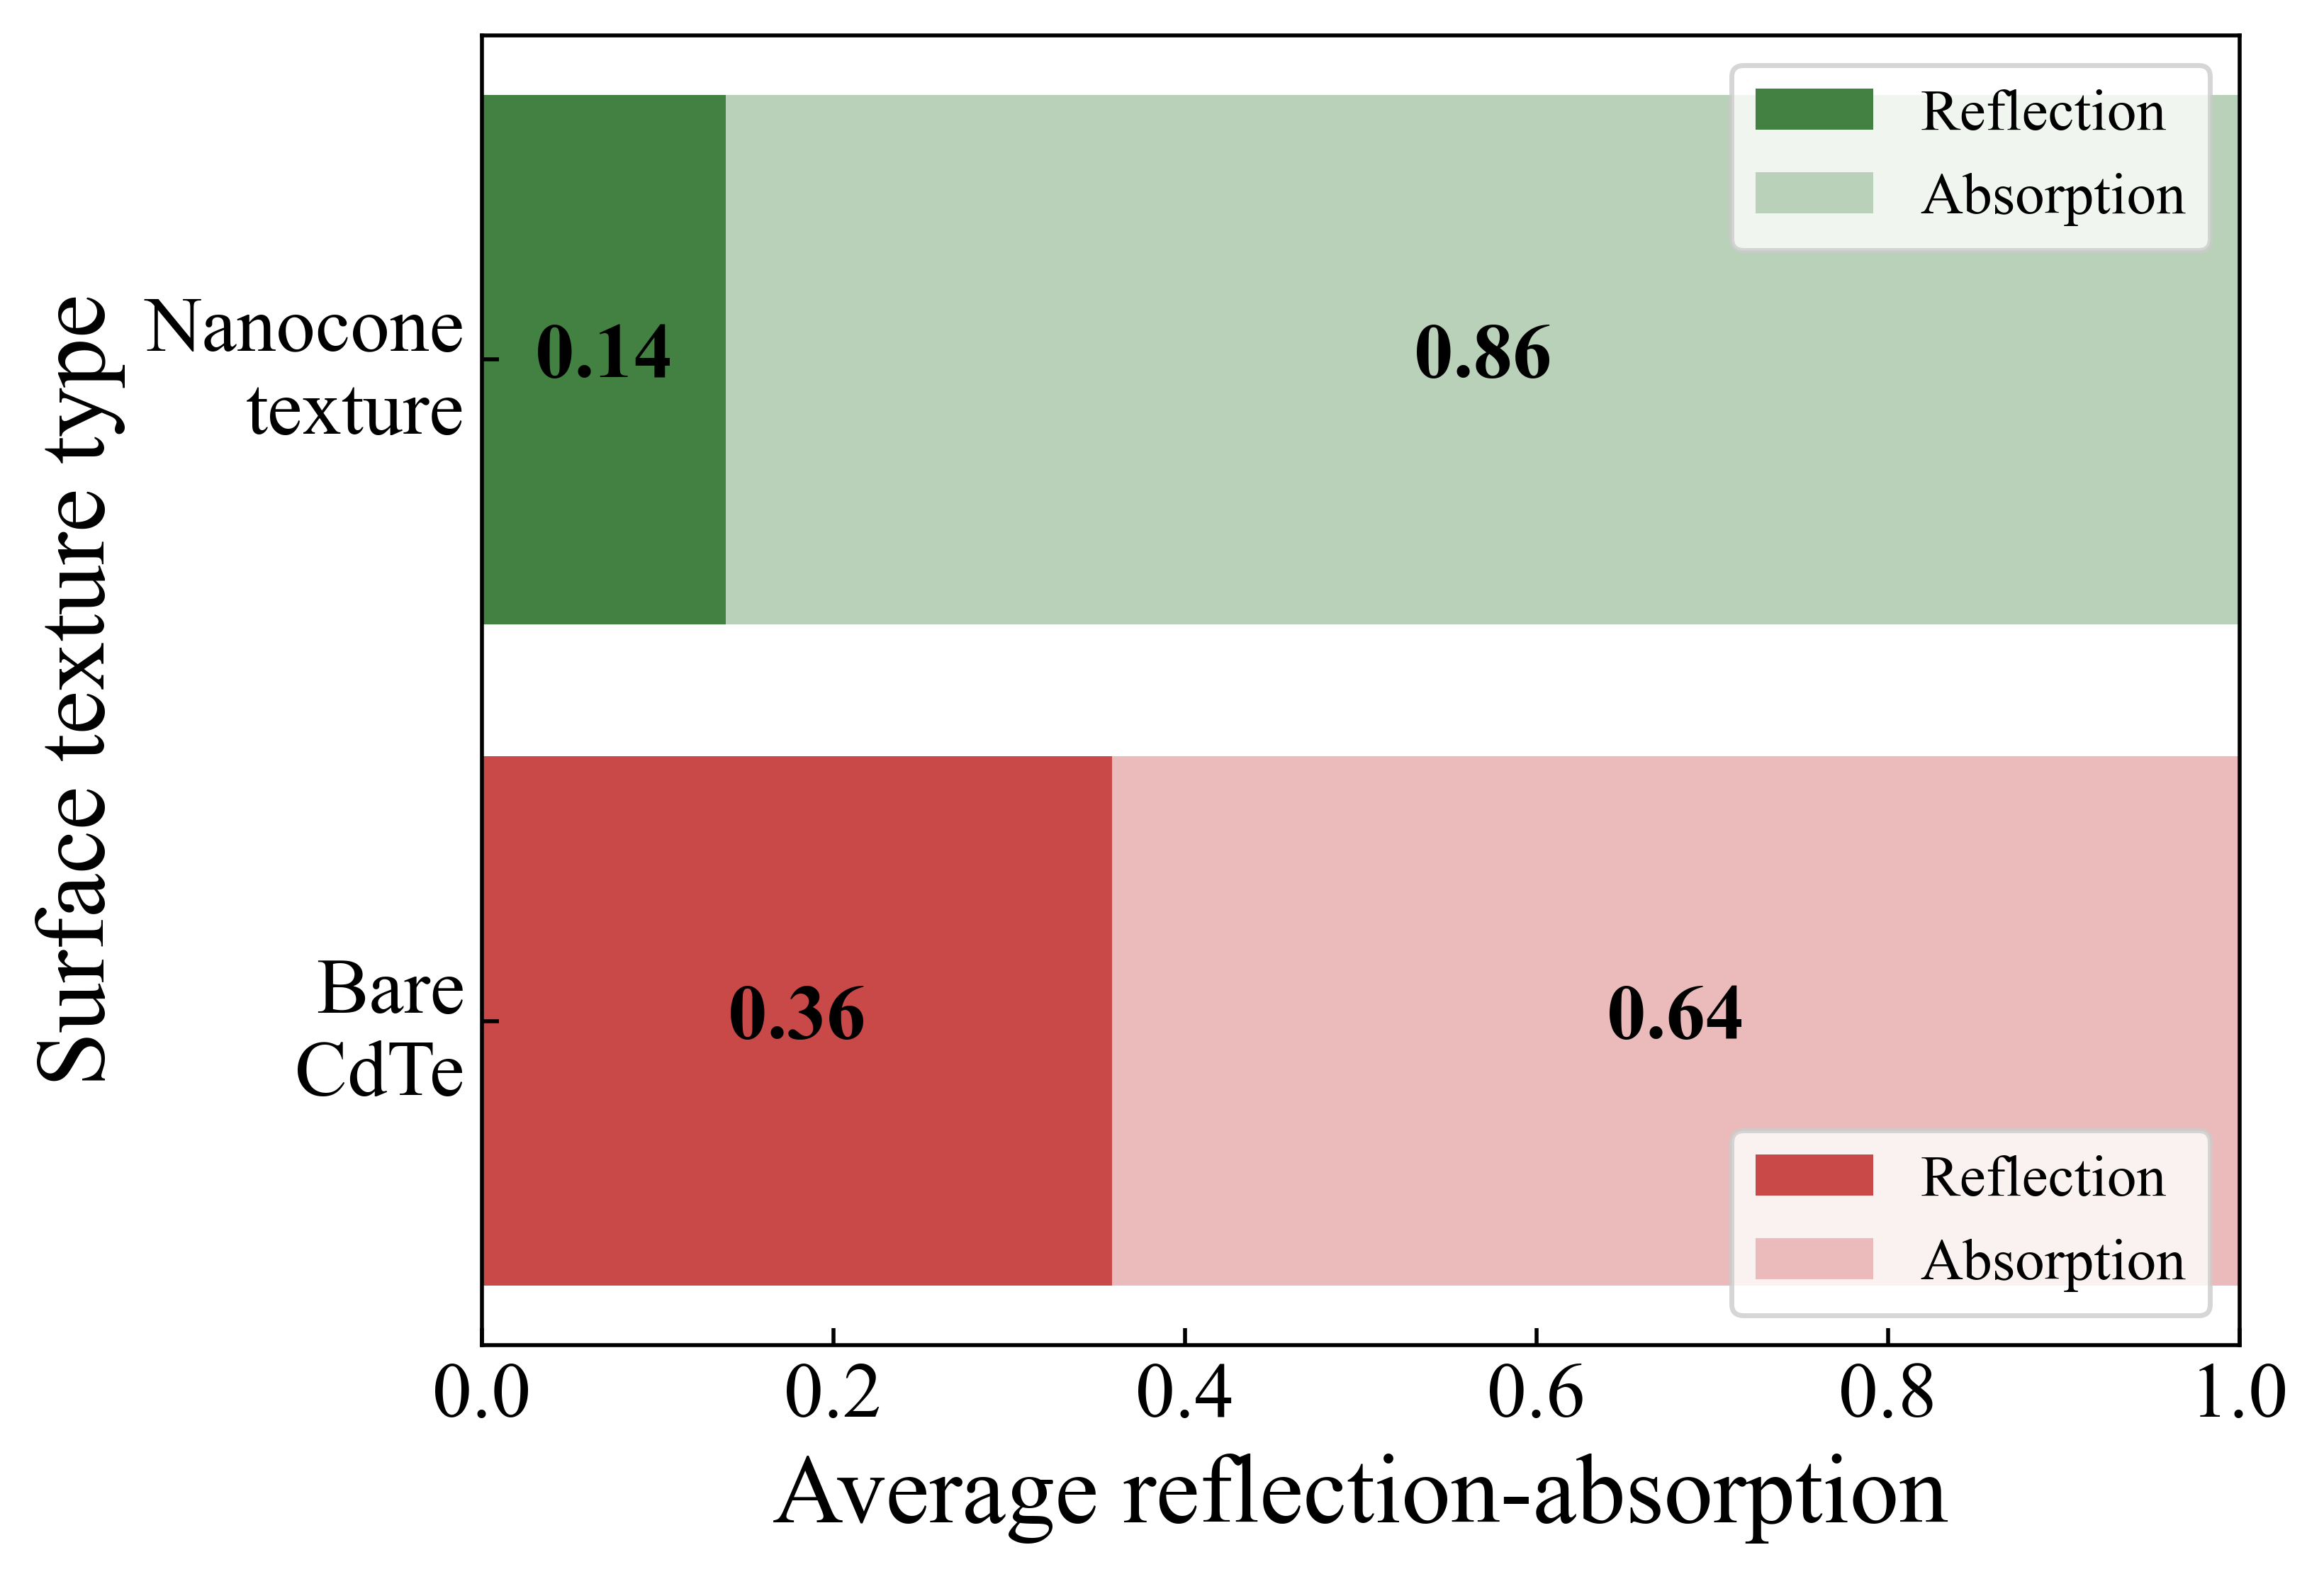

In [5]:
import h5py

# Load MATLAB data file
mat_file = h5py.File('COMBINED.mat')

# Extract data from file and assign to variables
f = mat_file['f'][:]
r1 = mat_file['R_bare'][:]
r2 = mat_file['R_st'][:]

lightspeed = 299792458  # m/s
wavelength = (lightspeed*1e9)/f

# Transpose the array
w = wavelength.T
R1 = r1.T
R2 = r2.T
# R3 = r3.T

#--------------------------------#

x = np.array(w).flatten()
x = np.flip(x)

y1 = np.array(R1).flatten()
y2 = np.array(R2).flatten()

y1 = np.flip(y1)
y2 = np.flip(y2)


total_reflection = -(1100-400)*1     # wavelength range of the source

bare_avg_reflec = integrate.simpson(y1, x)/total_reflection
np_avg_reflec = integrate.simpson(y2, x)/total_reflection

print(bare_avg_reflec, np_avg_reflec)

#--------------------------------#

fig, ax = plt.subplots(dpi=500)  # Set DPI to 500

texture = ['Bare\nCdTe', 'Nanocone\ntexture']
value = [bare_avg_reflec, np_avg_reflec]

# Calculate the extended portion for each bar (representing absorption)
extended_value = [1 - val for val in value]


color1 = '#c94949'
color1_light = '#ebbbbb'
color2 = '#438143'
color2_light = '#b9d0b9'


# Plot the original reflection values (reflection part of the bars)
bars1 = ax.barh([texture[0]], [value[0]], color=color1, label='Reflection (Bare CdTe)')
bars2 = ax.barh([texture[1]], [value[1]], color=color2, label='Reflection (Nanocone Texture)')

# Plot the extended portion up to 1 (absorption part of the bars)
bars3 = ax.barh([texture[0]], [extended_value[0]], left=[value[0]], color=color1_light, label='Absorption (Bare CdTe)')
bars4 = ax.barh([texture[1]], [extended_value[1]], left=[value[1]], color=color2_light, label='Absorption (Nanocone Texture)')

# Set labels and font sizes
ax.set_xlabel('Average reflection-absorption', weight='normal', fontsize=20)
ax.set_ylabel('Surface texture type', weight='normal', fontsize=20)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

# Set the x-axis range to show values from 0 to 1
ax.set_xlim(0, 1)

# Add labels in the middle of the original reflection bars
ax.annotate(f'{value[0]:.2f}', 
            (value[0] / 2, bars1[0].get_y() + bars1[0].get_height() / 2),  # Label in the middle of the bar
            ha='center', va='center', fontsize=16, weight='bold', color='black')

ax.annotate(f'{value[1]:.2f}', 
            (value[1] / 2, bars2[0].get_y() + bars2[0].get_height() / 2),  # Label in the middle of the bar
            ha='center', va='center', fontsize=16, weight='bold', color='black')

# Add labels in the middle of the extended portion bars
ax.annotate(f'{extended_value[0]:.2f}', 
            (value[0] + extended_value[0] / 2, bars3[0].get_y() + bars3[0].get_height() / 2),  # Label in the middle of the extended portion
            ha='center', va='center', fontsize=16, weight='bold', color='black')

ax.annotate(f'{extended_value[1]:.2f}', 
            (value[1] + extended_value[1] / 2, bars4[0].get_y() + bars4[0].get_height() / 2),  # Label in the middle of the extended portion
            ha='center', va='center', fontsize=16, weight='bold', color='black')

# Create two separate legends
from matplotlib.patches import Patch

# Legend for Bare CdTe
legend1_elements = [Patch(facecolor=color1, label='Reflection'),
                    Patch(facecolor=color1_light, label='Absorption')]
legend1 = ax.legend(handles=legend1_elements, loc='lower right', fontsize=12)

# Add the first legend
ax.add_artist(legend1)

# Legend for Nanocone Texture
legend2_elements = [Patch(facecolor=color2, label='Reflection'),
                    Patch(facecolor=color2_light, label='Absorption')]
legend2 = ax.legend(handles=legend2_elements, loc='upper right', fontsize=12)

# Customize tick marks (inside, bigger size, and thicker)
# axs.tick_params(direction='in', length=6, width=1.5, which='both')
ax.tick_params(direction='in', which='both')

plt.savefig('avg_ref_abs.pdf', format='pdf', dpi=600, bbox_inches='tight')

# Show the plot
plt.show()

#--------------------------------#
